In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import subprocess
%matplotlib inline

In [2]:
from opmap.RawCam import RawCam
from opmap.VmemMap import VmemMap
from opmap.PhaseMap import PhaseMap
from opmap.PhaseVarianceMap import PhaseVarianceMap
from opmap.util import makeMovie

In [3]:
output_name = '20170723'
folder_name = '20170721-1'

# vmem

In [4]:
vmem1 = RawCam(path='/mnt/recordings/SimulationResults/20170721-1', cam_type='numpy', image_width=200, image_height=200, frame_start=0, frame_end=-1)
#vmem2 = RawCam(path='/mnt/recordings/SimulationResults/20170713-2/', cam_type='numpy', image_width=200, image_height=200, frame_start=0, frame_end=-1)
#vmem3 = RawCam(path='/mnt/recordings/SimulationResults/20170713-3', cam_type='numpy', image_width=200, image_height=200, frame_start=0, frame_end=-1)
#vmem4 = RawCam(path='/mnt/recordings/SimulationResults/20170714-2/', cam_type='numpy', image_width=200, image_height=200, frame_start=0, frame_end=-1)

In [5]:
vmem1.data = np.vstack((vmem1.data, vmem2.data[1:, :, :]))
#vmem1.data = np.vstack((vmem1.data, vmem3.data[1:, :, :]))
vmem1.data = np.vstack((vmem1.data, vmem4.data[1:, :, :]))

In [5]:
vmem1.data.shape

(1001, 200, 200)

In [6]:
vmem_temp = VmemMap(vmem1)
vmem1.cmap = vmem_temp.cmap

In [7]:
plt.imshow(vmem1.data[0, :, :], vmin=np.min(vmem1.data), vmax=np.max(vmem1.data), cmap=vmem1.cmap)
plt.colorbar()
plt.savefig('/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20170723/vmem.png', dpi=1000)
plt.close()

In [8]:
vmem1.saveImage('/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/%s/%s/vmem' % (output_name, folder_name))

# phase map

In [9]:
pmap = PhaseMap(vmem1, shrink=2)

In [10]:
pmap.saveImage('/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/%s/%s/pmap' % (output_name, folder_name))

# phase variance map

In [11]:
pvmap = PhaseVarianceMap(pmap, size=3)

In [12]:
pvmap.saveImage('/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/%s/%s/pvmap' % (output_name, folder_name))

# make movie

In [13]:
subprocess.call('ffmpeg -r 30 -y -i "/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/{0}/{1}/vmem/%06d.png" -c:v libx264 -pix_fmt yuv420p -qscale 0 "/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/{0}/{1}/vmem/vmem.mp4"'.format(output_name, folder_name), shell=True)
subprocess.call('ffmpeg -r 30 -y -i "/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/{0}/{1}/pmap/%06d.png" -c:v libx264 -pix_fmt yuv420p -qscale 0 "/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/{0}/{1}/pmap/pmap.mp4"'.format(output_name, folder_name), shell=True)
subprocess.call('ffmpeg -r 30 -y -i "/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/{0}/{1}/pvmap/%06d.png" -c:v libx264 -pix_fmt yuv420p -qscale 0 "/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/{0}/{1}/pvmap/pvmap.mp4"'.format(output_name, folder_name), shell=True)

0

In [17]:
a = np.ones((200, 200))
for i in range(200):
    for j in range(200):
        if (i-100)*(i-100)+(j-150)*(j-150) < 900:
            a[i][j] = 0
for i in range(200):
    for j in range(200):
        if (i-100)*(i-100)+(j-100)*(j-100) < 100:
            a[i][j] = 0

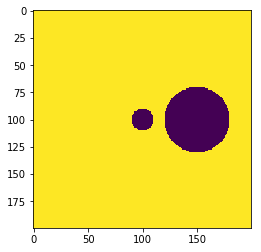

In [19]:
plt.imshow(a)
plt.imsave('/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20170723/mask.png', a, dpi=500)